# EDA - Nivel 1

## Nivel 1 - Análisis básico

En este nivel, nuestro objetivo es dominar lo básico: entender la estructura de nuestros datos antes de intentar cualquier modelado complejo.

Nos enfocaremos en las siguientes etapas:

- **Calidad del Dato**: Entender tipos de variables (numéricas vs. categóricas) y detectar valores nulos.
- **Análisis Univariado**: Estudiar cada variable por separado (distribución, conteos).
- **Limpieza Básica**: Resolver problemas sencillos de datos faltantes.
- **Relación Inicial**: Ver como algunas columnas ayudan a establecer una diferencia.

Para este ejemplo haremos uso de una fuente de datos simple, se trata de un colección de datos sobre 3 especies de pingüinos antárticos.

- Adelie  
- Chinstrap
- Gentoo

El dataset contiene las siguientes columnas:

- species
- culmen_length_mm
- culmen_depth_mm
- flipper_length_mm
- body_mass_g
- island
- sex


Fuente: [Palmer Archipelago Antarctica Penguin Data](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

# 1. CARGA DE DATOS

In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Importamos el dataset

base_dir = Path.cwd()
csv_file_path = base_dir.parent.parent.parent / "data" / "penguins" / "penguins_size.csv"
df = pd.read_csv(csv_file_path, low_memory=False)

# Mostramos la primera fila del DataFrame para verificar que se ha cargado correctamente
df.head(1)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE


# 2. INSPECCIÓN GENERAL

### Objetivo
Antes de analizar nada, debemos entender la "forma" y la salud técnica de los datos.

#### 1. Dimensiones
Primero verificamos el tamaño del dataset. ¿Cuántas observaciones (filas) y variables (columnas) tenemos?

In [4]:
# .shape nos devuelve una tupla con el número de (filas, columnas)
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (344, 7)


> **Análisis:** Observamos que tenemos 344 filas y 7 columnas. Es un dataset pequeño, ideal para aprender.

#### 2. Tipos de Datos
Es fundamental saber qué columnas son numéricas y cuáles son texto (objetos). Esto es crucial para evitar errores, como intentar calcular el promedio de una columna de texto.

In [5]:
# .info() nos muestra los tipos de datos y si hay valores faltantes (null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# De forma alternativa puedes usar .dtypes para ver los tipos de datos de cada columna
df.dtypes.value_counts()

float64    4
object     3
Name: count, dtype: int64

> **Análisis:** Vemos que hay columnas 'object' (texto) como `species`, `island`, `sex`. También notamos que algunas columnas tienen menos de 344 valores 'non-null', lo que indica datos faltantes que deberemos tratar.

#### 3. Estadísticas Básicas
Damos un vistazo rápido a la distribución de las variables numéricas: media, mínimo, máximo y desviación estándar. Esto nos ayuda a identificar rangos extraños a primera vista.

In [7]:
# .describe() genera un resumen estadístico de las columnas numéricas
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


> **Análisis:** Aquí vemos rangos de valores. Por ejemplo, la masa corporal va de 2700g a 6300g. No parecen haber valores negativos o imposibles (como peso 0) a simple vista.

# 3. ANÁLISIS DE VARIABLE OBJETIVO

### Objetivo
Conocer qué estamos intentando predecir. En este caso: **species**.

#### Pregunta clave
¿Está balanceado el dataset? ¿Hay muchos más pingüinos de una especie que de otra?

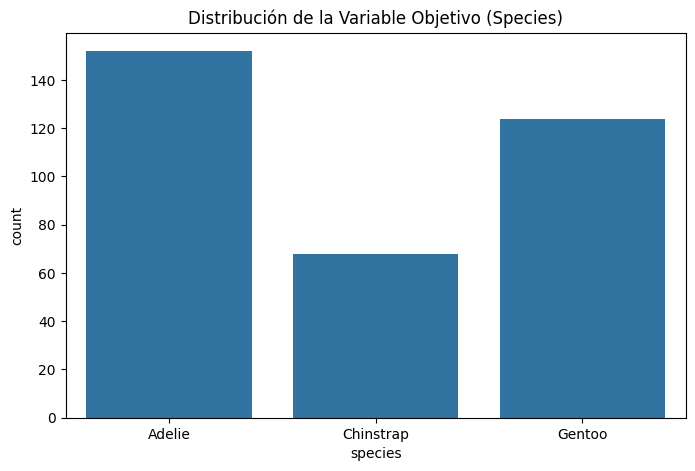

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df)
plt.title('Distribución de la Variable Objetivo (Species)')
plt.show()

# Verificamos los números exactos
print(df['species'].value_counts())

> **Análisis:** Notamos que 'Adelie' es la clase mayoritaria (152), seguida de 'Gentoo' (124) y 'Chinstrap' (68). Hay un desbalance, pero no es extremo.

# 4. ANÁLISIS UNIVARIADO (VARIABLE POR VARIABLE)
### Objetivo
Ver cómo se comportan las variables "explicativas" (features) por separado.

#### 4.1 Variables Numéricas
Analizaremos la distribución de variables como el largo de la aleta, la masa corporal y las medidas del pico. Usaremos histogramas para ver si siguen una distribución normal o si tienen sesgos.

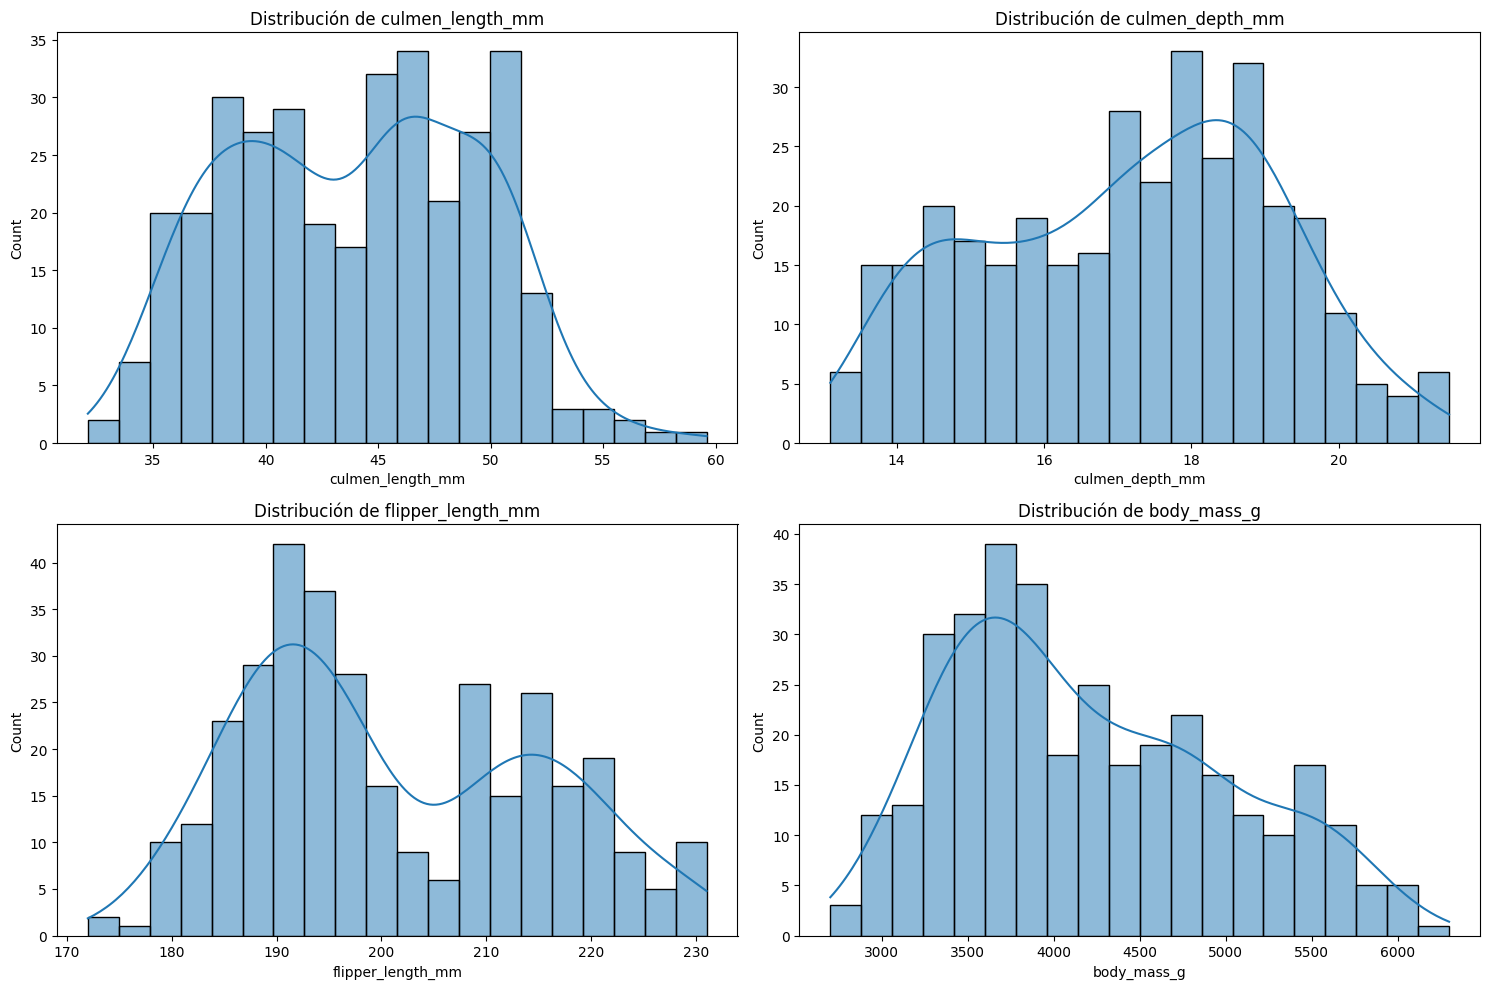

In [9]:
# Seleccionamos columnas numéricas de interés
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

> **Análisis:**
> 
> - **Flipper Length (Aleta):** Parece tener una distribución bimodal (dos picos), lo que sugiere que podría haber dos grupos distintos de pingüinos mezclados (quizás por especie).
> - **Body Mass (Masa):** Tiene un sesgo positivo (cola hacia la derecha), indicando que hay menos pingüinos muy pesados.

#### 4.2 Variables Categóricas
Ahora veremos las variables cualitativas: Isla y Sexo.

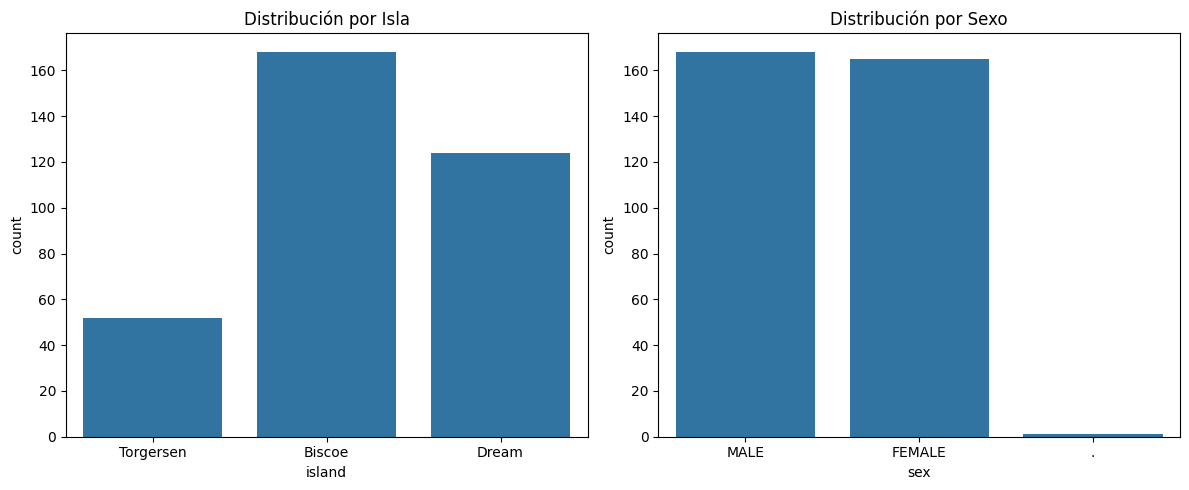

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para Island
sns.countplot(x='island', data=df, ax=axes[0])
axes[0].set_title('Distribución por Isla')

# Gráfico para Sex
sns.countplot(x='sex', data=df, ax=axes[1])
axes[1].set_title('Distribución por Sexo')

plt.tight_layout()
plt.show()

> **Análisis:**
> 
> - **Isla:** La isla 'Biscoe' tiene la mayor cantidad de registros.
> - **Sexo:** Parece haber un problema en la columna 'sex'. Vemos una barra muy pequeña o extraña (posiblemente un punto '.' o valor nulo malformado) además de Male/Female. Esto es un hallazgo de calidad de datos importante.

# 5. LIMPIEZA DE DATOS
### Objetivo
Resolver problemas obvios antes de buscar relaciones complejas.

#### 1. Detección de Valores Nulos
Primero identificamos dónde están los valores faltantes (NaN).

In [11]:
# .isnull().sum() cuenta los valores nulos por columna
print(df.isnull().sum())

# También verificamos el valor extraño en 'sex' que vimos antes
print("\nValores únicos en 'sex':", df['sex'].unique())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Valores únicos en 'sex': ['MALE' 'FEMALE' nan '.']


> **Análisis:**
> 
> - Vemos algunos valores nulos en las variables numéricas y en `sex`.
> - Confirmamos que en `sex` hay un valor `.` que debe ser tratado como nulo o error.

#### 2. Acción
En este nivel básico, aplicaremos dos estrategias comunes:

1.  **Imputación:** Rellenar los valores faltantes con un estimado razonable. Para variables categóricas como `sex`, usaremos la **moda** (el valor más frecuente).
2.  **Eliminación:** Si son pocas filas las que tienen datos faltantes en variables numéricas, podemos optar por eliminarlas para no introducir ruido.

In [12]:
# 1. Tratamos el valor '.' en 'sex' como NaN
df.loc[df['sex'] == '.', 'sex'] = np.nan

# 2. Imputamos 'sex' con la moda
moda_sex = df['sex'].mode()[0]
df['sex'] = df['sex'].fillna(moda_sex)
print(f"Valores nulos en 'sex' después de imputar: {df['sex'].isnull().sum()}")

# 3. Eliminamos filas con nulos restantes (en variables numéricas)
# Como son pocas (menos del 5% de los datos), la eliminación es segura en este nivel.
df = df.dropna()

# Verificamos que el dataset esté limpio
print("\nConteo de nulos final:")
print(df.isnull().sum())
print(f"\nDimensiones finales del dataset: {df.shape}")

Valores nulos en 'sex' después de imputar: 0

Conteo de nulos final:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Dimensiones finales del dataset: (342, 7)


# 6. ANÁLISIS BIVARIADO (RELACIONES)
### Objetivo
En este punto verificaremos si las variables ayudan a separar las especies.

#### 6.1 Numérico vs. Variable Objetivo
¿La masa corporal varía según la especie? Usaremos un **boxplot** para visualizar la distribución de la masa corporal para cada especie.

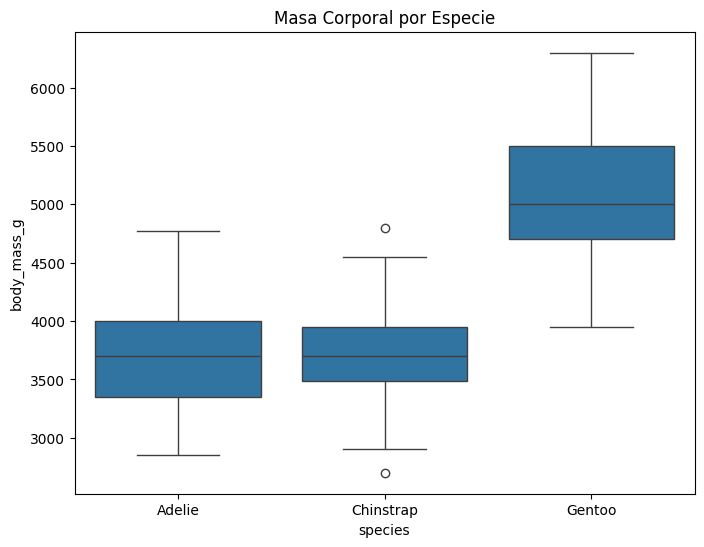

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Masa Corporal por Especie')
plt.show()

> **Análisis:**
> 
> - Vemos que la especie **Gentoo** es claramente más pesada que las otras dos (Adelie y Chinstrap).
> - Adelie y Chinstrap tienen rangos de peso similares, por lo que la masa corporal por sí sola no es suficiente para distinguirlas entre ellas.

#### 6.2 Numérico vs. Numérico (Scatterplot)
Este es el gráfico más poderoso. Veremos la relación entre el largo y la profundidad del pico, coloreando los puntos por especie (`hue='species'`).

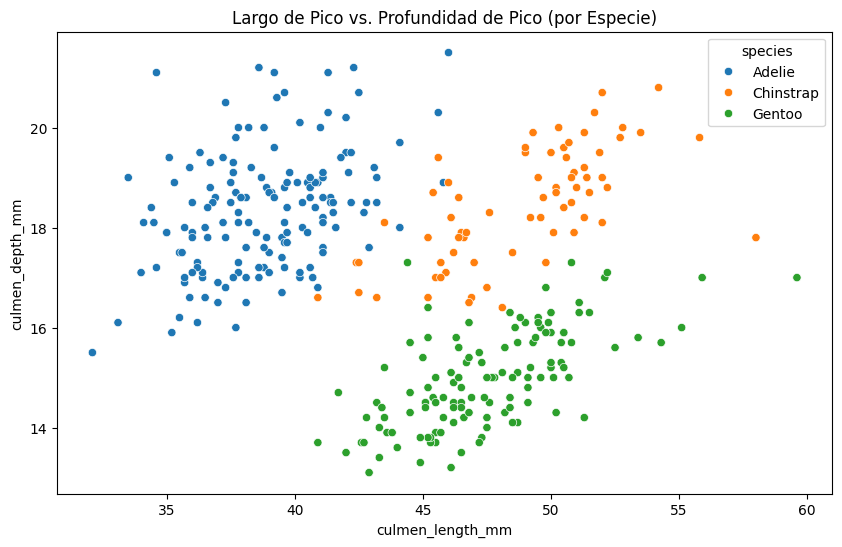

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df)
plt.title('Largo de Pico vs. Profundidad de Pico (por Especie)')
plt.show()

> **Análisis:**
> 
> - Este gráfico es revelador. Podemos ver tres grupos claramente separados.
> - **Adelie:** Picos cortos y profundos (abajo a la izquierda/centro).
> - **Gentoo:** Picos de longitud media pero menos profundos (abajo a la derecha).
> - **Chinstrap:** Picos largos y profundos (arriba a la derecha).
> - Esto confirma que la combinación de estas dos variables es excelente para clasificar las especies.

# 7. CONCLUSIONES
### Resumen de Hallazgos
Hemos completado nuestro primer Análisis Exploratorio de Datos (EDA).

**¿Qué hemos aprendido?**

1.  **Calidad de Datos:** El dataset es pequeño pero tenía problemas reales (valores nulos, un valor extraño en 'sex'). Aprendimos a detectarlos y solucionarlos con estrategias básicas.
2.  **Variables Importantes:**
    *   La **Masa Corporal** ayuda a separar a los *Gentoo* (más pesados) de los otros dos, pero confunde a *Adelie* y *Chinstrap*.
    *   La combinación de **Largo de Pico** y **Profundidad de Pico** es la clave. El scatterplot nos mostró tres grupos bien definidos.

### Próximos Pasos (Nivel 2)
Aunque hemos limpiado y visualizado los datos, todavía no están listos para un algoritmo de Machine Learning.

*   **Codificación:** Los modelos matemáticos no entienden texto como "Male", "Female" o "Biscoe". Necesitaremos convertir estas categorías a números (Encoding).
*   **Correlaciones:** Necesitamos medir matemáticamente qué tan fuerte es la relación entre variables (Matriz de Correlación).